In [1]:
# PART 1: Data Understanding

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import warnings
warnings.filterwarnings('ignore')

plt.style.use('bmh')
sns.set_style('darkgrid')


In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\kishore\OneDrive\Desktop\Machine_Learning\Assignment_Data-Preprocessing\diabetes_data.csv")

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,NaN,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47.0,1.0


In [3]:
print("First 5 rows:")
display(df.head())

print("\nShape:")
print(df.shape)

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics (Raw):")
display(df.describe())

print("\nMissing Values (Raw):")
print(df.isnull().sum())


First 5 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0



Shape:
(768, 9)

Data Types:
Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                         float64
Outcome                     float64
dtype: object

Summary Statistics (Raw):


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,728.000000,722.000000,735.000000,726.000000,735.000000,729.000000,734.000000,735.000000,739.000000
mean,3.912088,120.671745,68.927891,20.632231,80.268027,32.028807,0.467578,33.308844,0.341001
std,3.382204,31.982858,19.590744,16.012616,116.198612,7.904681,0.325979,11.727195,0.474367
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.238250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,29.000000,32.000000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,130.000000,36.600000,0.622750,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000



Missing Values (Raw):
Pregnancies                 40
Glucose                     46
BloodPressure               33
SkinThickness               42
Insulin                     33
BMI                         39
DiabetesPedigreeFunction    34
Age                         33
Outcome                     29
dtype: int64


## 📘 PART 2 — Handling Invalid Values + Missing Imputation

This dataset contains many biologically impossible values:

#### ❌ **Zeros (must be NaN)**
- Glucose
- BloodPressure  
- SkinThickness
- Insulin
- BMI

#### ❌ **Non-zero but biologically impossible values**

| Feature | Impossible / Suspect Values |
|---------|-----------------------------|
| BloodPressure | BP < 40 |
| SkinThickness | ST < 10 |
| BMI | BMI < 10 |
| Insulin | Insulin < 15 or > 400 |

**These MUST be replaced with NaN before imputation.**

In [4]:
# PART 2: Replace impossible zero values with NaN
zero_invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[zero_invalid_cols] = df[zero_invalid_cols].replace(0, np.nan)

print("Missing after zero → NaN:")
df.isnull().sum()


Missing after zero → NaN:


Pregnancies                  40
Glucose                      51
BloodPressure                68
SkinThickness               256
Insulin                     392
BMI                          49
DiabetesPedigreeFunction     34
Age                          33
Outcome                      29
dtype: int64

# 📘 Medical Validity Filters (Important!)

Below are medically plausible thresholds:

- **BloodPressure < 40** → impossible
- **SkinThickness < 10** → biologically too thin  
- **BMI < 10** → impossible
- **Insulin < 15 or > 400** → measurement errors

**These must also become NaN.**

In [5]:
# Additional biological plausibility cleaning
df['BloodPressure'] = df['BloodPressure'].mask(df['BloodPressure'] < 40, np.nan)
df['SkinThickness'] = df['SkinThickness'].mask(df['SkinThickness'] < 10, np.nan)
df['BMI'] = df['BMI'].mask(df['BMI'] < 10, np.nan)
df['Insulin'] = df['Insulin'].mask((df['Insulin'] < 15) | (df['Insulin'] > 400), np.nan)

print("Missing values after biological cleaning:")
df.isnull().sum()


Missing values after biological cleaning:


Pregnancies                  40
Glucose                      51
BloodPressure                72
SkinThickness               260
Insulin                     413
BMI                          49
DiabetesPedigreeFunction     34
Age                          33
Outcome                      29
dtype: int64

In [6]:
# Save pre-imputation dataset for visualization
df_before = df.copy()


In [7]:
# Median imputation for numeric columns
cols_median = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
               'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for col in cols_median:
    df[col].fillna(df[col].median(), inplace=True)

# Mode for Outcome
df['Outcome'].fillna(df['Outcome'].mode()[0], inplace=True)

print("Missing values AFTER imputation:")
df.isnull().sum()


Missing values AFTER imputation:


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
print("Corrected & Meaningful Summary Statistics:")
df.describe()


Corrected & Meaningful Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.864583,121.213542,72.557292,29.282552,127.404948,32.456771,0.463169,33.123698,0.328125
std,3.299069,29.448804,11.417037,8.455859,53.234164,6.763915,0.319330,11.505412,0.469837
min,0.000000,44.000000,40.000000,10.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,26.000000,120.000000,27.700000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,120.000000,32.200000,0.368000,29.000000,0.000000
75%,6.000000,138.250000,80.000000,32.000000,120.000000,36.300000,0.605000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,392.000000,67.100000,2.420000,81.000000,1.000000


### PART 3: Visualizing Before & After Imputation

In this step, we compare how each feature looked **before** and **after** imputation.  
This helps us visualize whether median/mode imputation changed the distribution or improved smoothness.


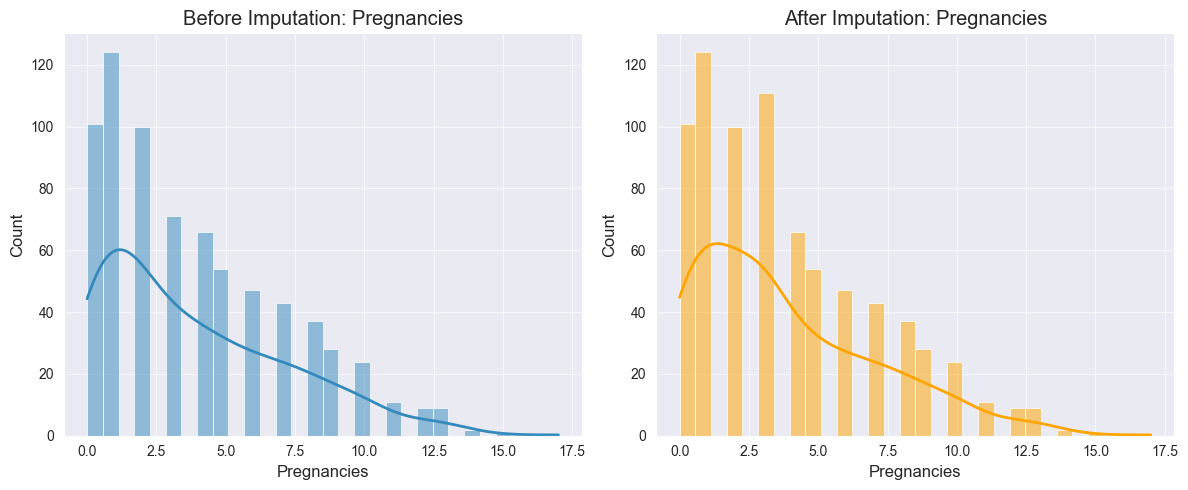

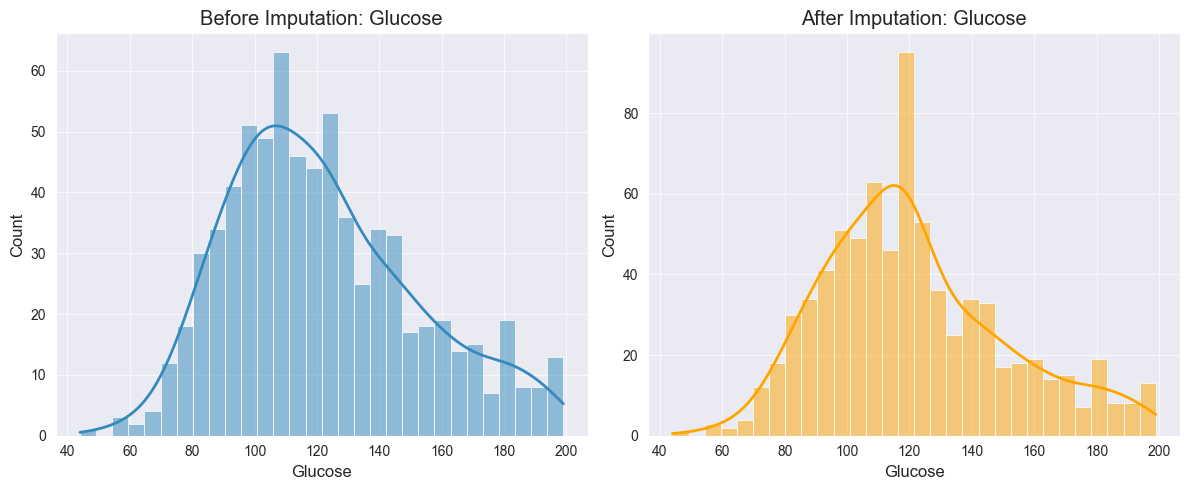

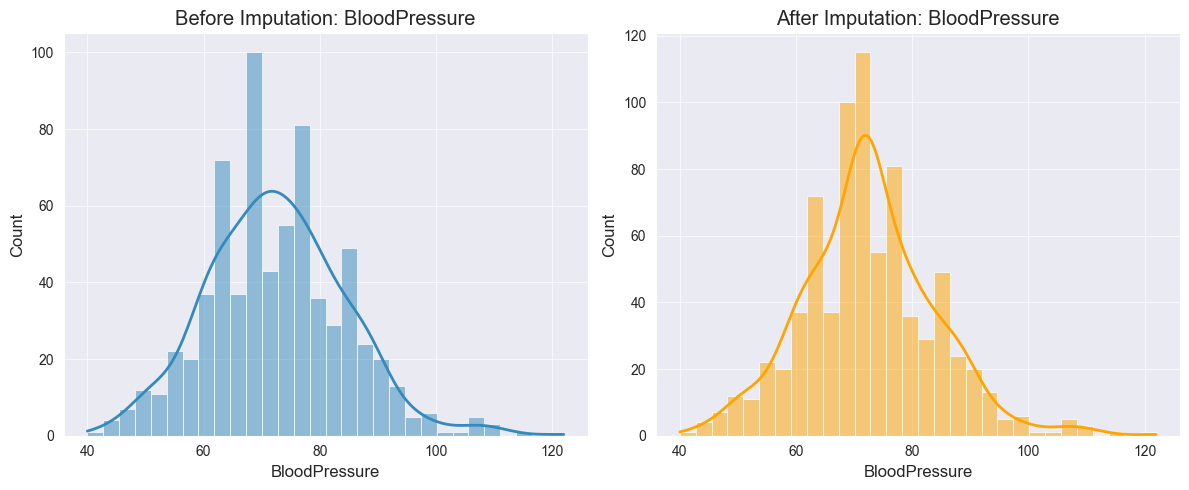

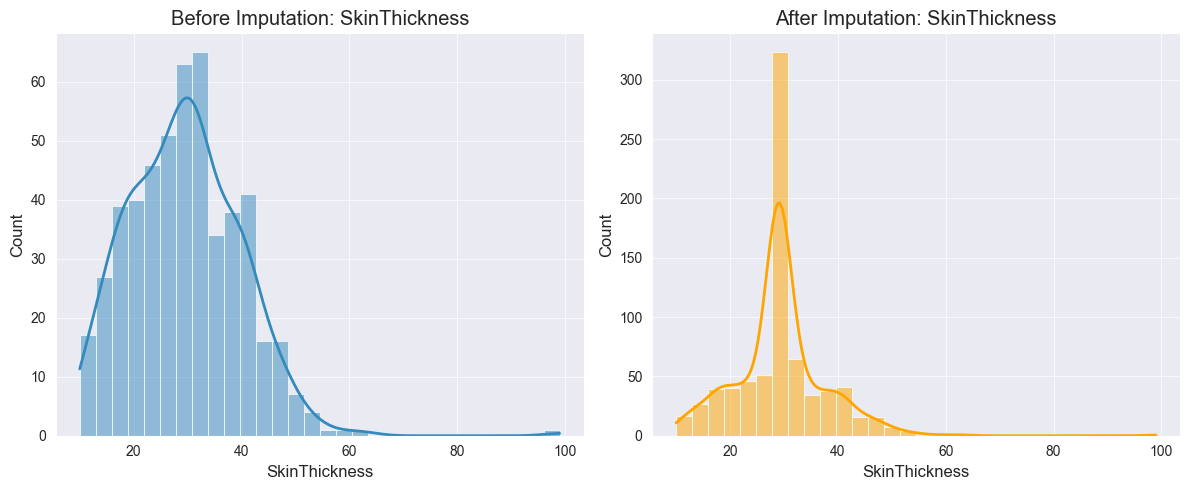

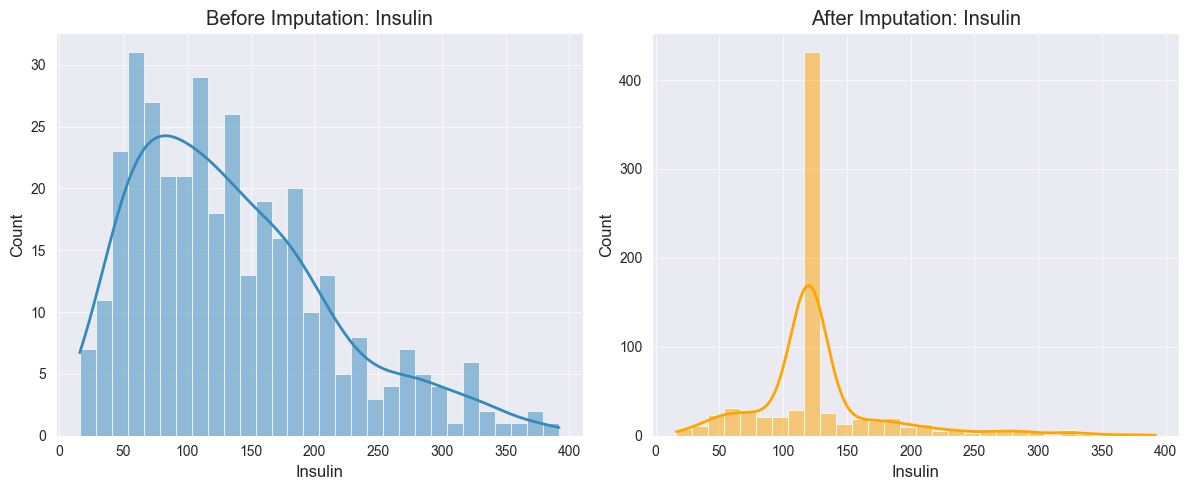

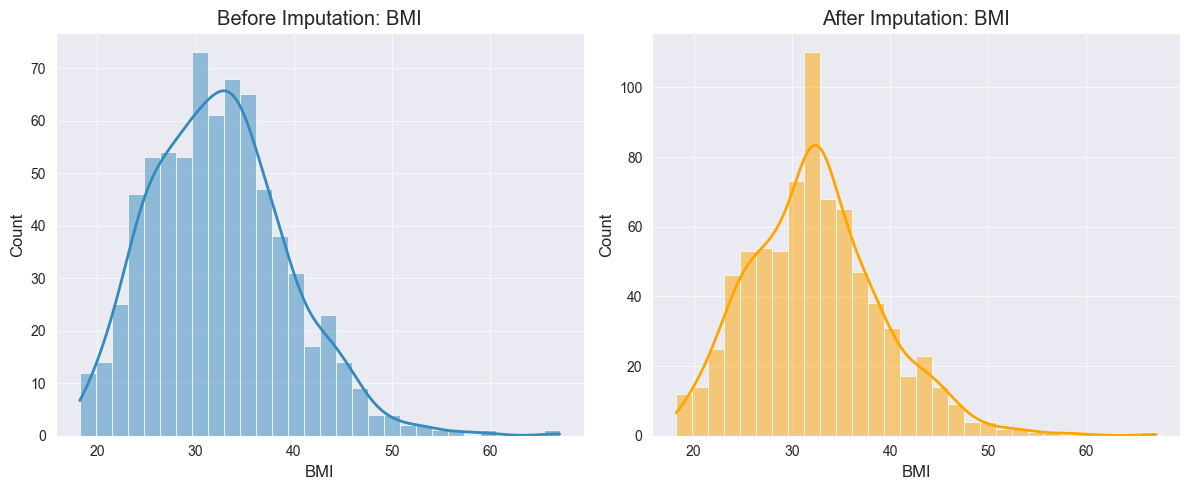

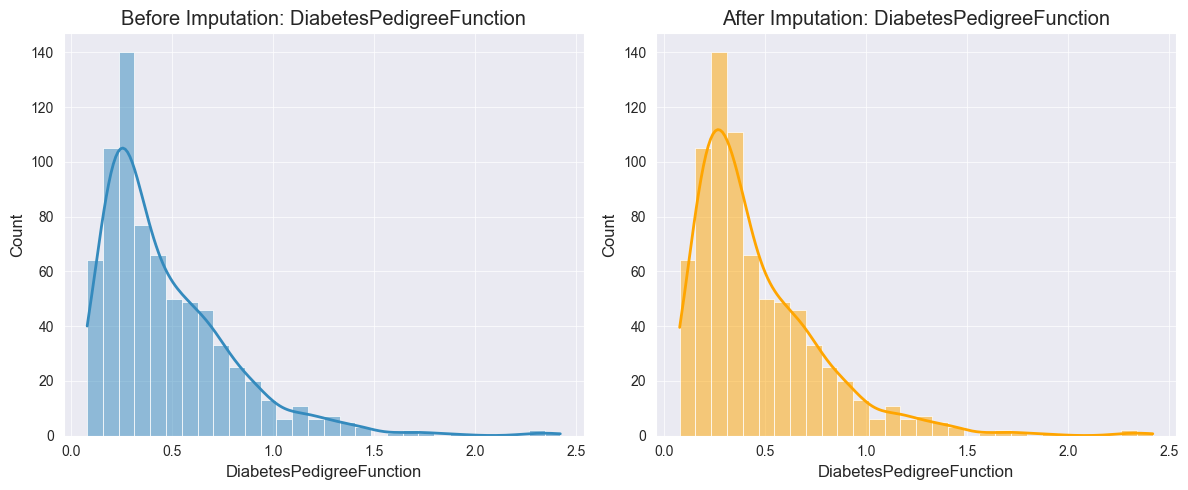

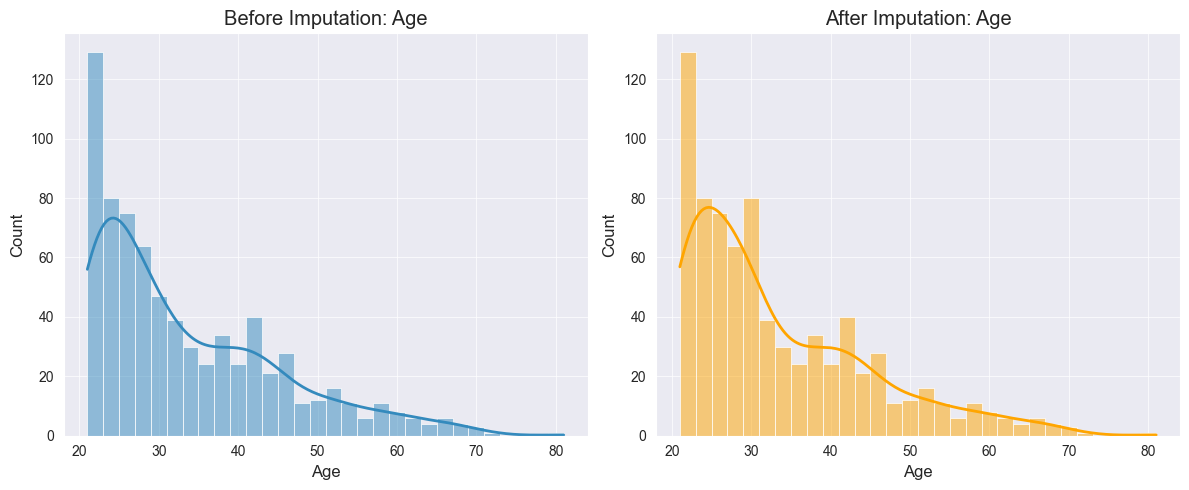

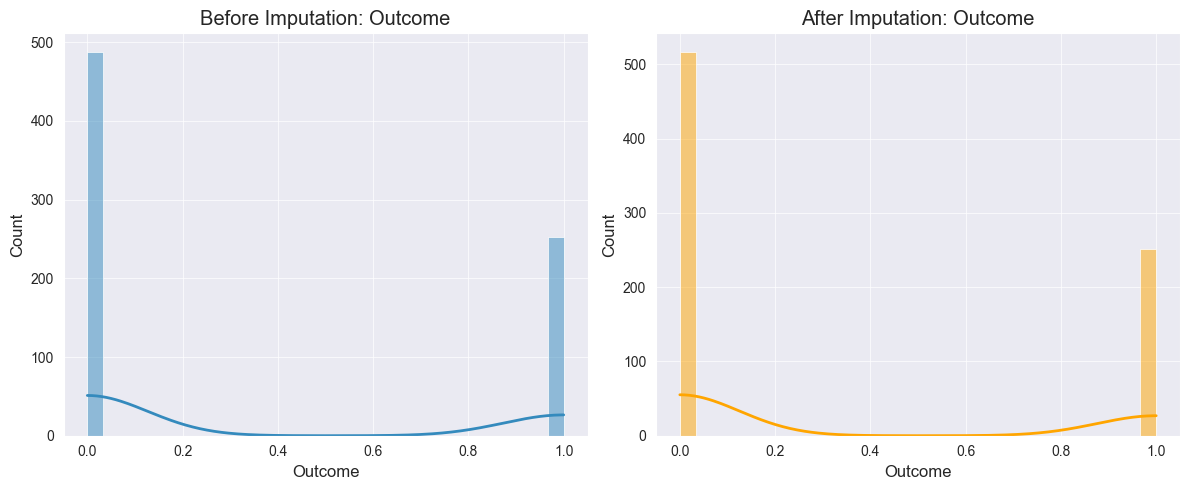

In [9]:
columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                   'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

for col in columns_to_plot:
    plt.figure(figsize=(12, 5))

    # BEFORE
    plt.subplot(1, 2, 1)
    sns.histplot(df_before[col], kde=True, bins=30)
    plt.title(f"Before Imputation: {col}")

    # AFTER
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True, bins=30, color='orange')
    plt.title(f"After Imputation: {col}")

    plt.tight_layout()
plt.show();


## 📊 Comprehensive Imputation Analysis

#### 1️⃣ **Pregnancies** (40 missing → biological rules do not apply)
- **Before**: Naturally right-skewed; missing values created small gaps but no unrealistic values existed
- **After**: Median imputation smoothed the center while preserving skewness
- **Appropriateness**: Median is ideal due to skew and natural outliers
- **Impact**: Distribution remained structurally unchanged with improved continuity

#### 2️⃣ **Glucose** (46 raw → 51 after zero→NaN → 51 after biological check)
- **Before**: Zeros inflated lower range and created artificial dips
- **After**: Removing zeros and imputing with median produced a medically realistic distribution with no false low-glucose values
- **Appropriateness**: Median is robust for skewed glucose data
- **Impact**: Smoother distribution and corrected medical plausibility

#### 3️⃣ **BloodPressure** (33 raw → 68 after zero→NaN → 72 after biological cleaning)
- **Before**: Many impossible low values (<40) created a false left tail
- **After**: Biological screening removed unrealistic readings; median imputation restored a healthy distribution
- **Appropriateness**: Median handles non-normal shape and heavy missingness well
- **Impact**: Mid-range distribution became stable and modeling-ready

#### 4️⃣ **SkinThickness** (42 raw → 256 after zero→NaN → 260 after biological cleaning)
- **Before**: Extremely high missingness produced large artificial spikes at zero
- **After**: Cleaning (<10 mm invalid) removed unrealistic values; median imputation produced a more continuous and interpretable distribution
- **Appropriateness**: Median is the only stable option with >30% missing data
- **Impact**: Significant improvement in smoothness and biological realism

#### 5️⃣ **Insulin** (33 raw → 392 after zero→NaN → 413 after biological cleaning)
- **Before**: Distribution was heavily distorted by zeros and extreme outliers (>400 µU/mL)
- **After**: Removing physiologically implausible values and imputing with median reduced skewness and corrected false clustering
- **Appropriateness**: Median prevents the extreme values from pulling the imputed values
- **Impact**: Resulting distribution is far more interpretable and model-friendly

#### 6️⃣ **BMI** (39 raw → 49 after zero→NaN → 49 after biological cleaning)
- **Before**: Impossible BMI values (0 or <10) introduced unrealistic dips
- **After**: Removing invalid entries and imputing with median restored natural shape
- **Appropriateness**: Median handles right-skew while preventing artificial shifts
- **Impact**: Central tendency became clearer with realistic human BMI ranges

#### 7️⃣ **DiabetesPedigreeFunction** (34 missing → unchanged through all steps)
- **Before**: Mild right-skew with missing values breaking continuity
- **After**: Median imputation filled gaps while preserving original structure
- **Appropriateness**: Suitable due to skew and occasional outliers
- **Impact**: Smooth, uninterrupted genetic-risk distribution

#### 8️⃣ **Age** (33 missing → unchanged through cleaning)
- **Before**: Right-skewed adult age distribution with missing entries scattered
- **After**: Median imputation maintained population shape without pushing ages upward
- **Appropriateness**: Median avoids bias toward older ages
- **Impact**: Clean and continuous demographic profile

#### 9️⃣ **Outcome** (29 missing → always unchanged except final imputation)
- **Before**: Gaps in class distribution due to missing labels
- **After**: Mode imputation preserved original 0/1 class proportions
- **Appropriateness**: Mode is the correct method for binary categorical targets
- **Impact**: Class balance and interpretability fully retained

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.864583,121.213542,72.557292,29.282552,127.404948,32.456771,0.463169,33.123698,0.328125
std,3.299069,29.448804,11.417037,8.455859,53.234164,6.763915,0.319330,11.505412,0.469837
min,0.000000,44.000000,40.000000,10.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,26.000000,120.000000,27.700000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,120.000000,32.200000,0.368000,29.000000,0.000000
75%,6.000000,138.250000,80.000000,32.000000,120.000000,36.300000,0.605000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,392.000000,67.100000,2.420000,81.000000,1.000000


## PART 4: Data Scaling

Scaling helps normalize feature ranges and improves model performance.

We apply:
- **StandardScaler** → mean = 0, std = 1  
- **MinMaxScaler** → values scaled to [0, 1]  
- **RobustScaler** → uses median & IQR, resistant to outliers

Only numerical columns (excluding Outcome) are scaled.


In [11]:
numerical_cols = df.drop(columns=['Outcome']).columns
print("Numerical columns selected for scaling:")
numerical_cols


Numerical columns selected for scaling:


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [12]:
# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

In [13]:

# Apply StandardScaler
standard_scaled_df = pd.DataFrame(
    standard_scaler.fit_transform(df[numerical_cols]),
    columns=numerical_cols
)

# Apply MinMaxScaler
minmax_scaled_df = pd.DataFrame(
    minmax_scaler.fit_transform(df[numerical_cols]),
    columns=numerical_cols
)

# Apply RobustScaler
robust_scaled_df = pd.DataFrame(
    robust_scaler.fit_transform(df[numerical_cols]),
    columns=numerical_cols
)


In [14]:

print("Standard Scaled Data:")
display(standard_scaled_df.head())

print("\nMin-Max Scaled Data:")
display(minmax_scaled_df.head())

print("\nRobust Scaled Data:")
display(robust_scaled_df.head())


Standard Scaled Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.647700,0.910187,-0.048844,0.676593,-0.139192,0.169129,0.513379,1.467770
1,-0.868866,-1.230513,-0.574717,-0.033437,-0.139192,-0.037987,-0.351493,-0.184703
2,1.254327,2.099465,-0.750008,-0.033437,-0.139192,-1.354650,0.654391,-0.097731
3,-0.868866,-1.094596,-0.574717,-0.743466,-0.627919,-0.644539,-0.928075,-1.054425
4,-1.172180,0.536414,-2.853499,0.676593,0.763072,1.574556,5.718284,-0.010758



Min-Max Scaled Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.670968,0.390244,0.280899,0.276596,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.317073,0.213483,0.276596,0.286299,0.116567,0.166667
2,0.470588,0.896774,0.292683,0.213483,0.276596,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.317073,0.146067,0.207447,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.000000,0.280899,0.404255,0.509202,0.943638,0.200000



Robust Scaled Data:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.810458,0.000000,1.0,0.0,0.162791,0.719444,1.3125
1,-0.4,-0.836601,-0.400000,0.0,0.0,0.000000,-0.047222,0.1250
2,1.0,1.725490,-0.533333,0.0,0.0,-1.034884,0.844444,0.1875
3,-0.4,-0.732026,-0.400000,-1.0,-26.0,-0.476744,-0.558333,-0.5000
4,-0.6,0.522876,-2.133333,1.0,48.0,1.267442,5.333333,0.2500


### PART 5: Visualizing Before & After Scaling

#### StandardScaler Visualization

📌 StandardScaler — Before vs After Scaling


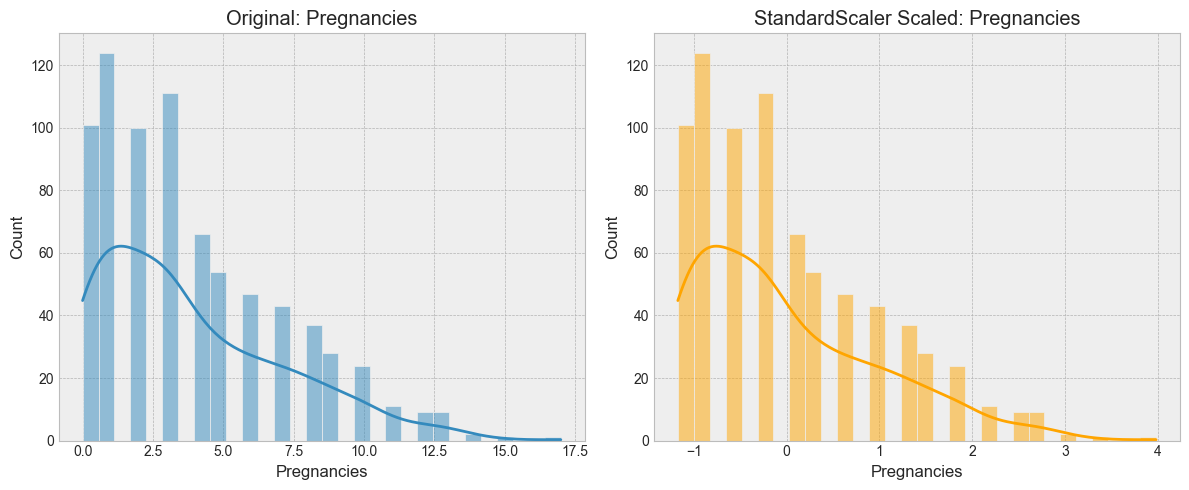

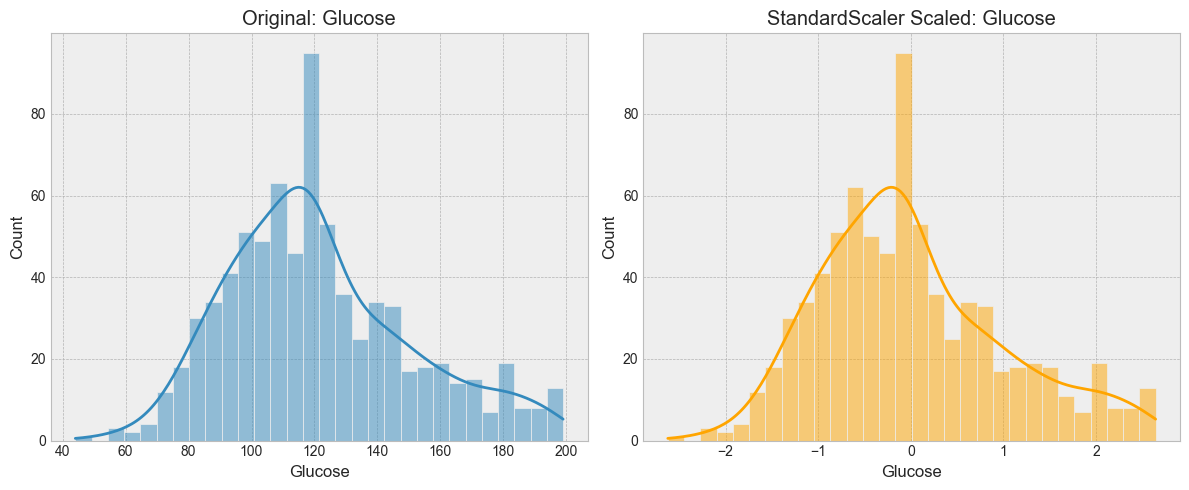

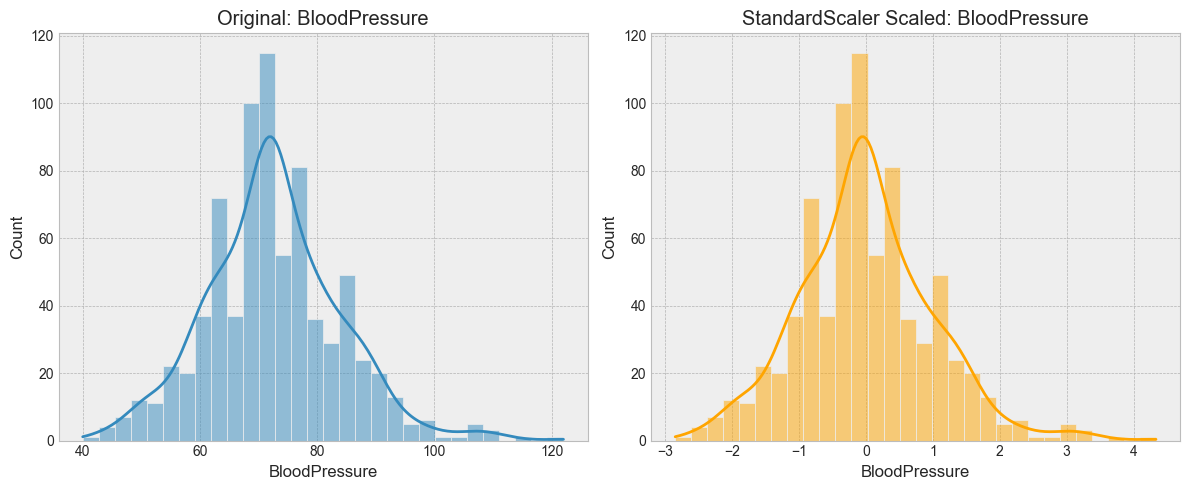

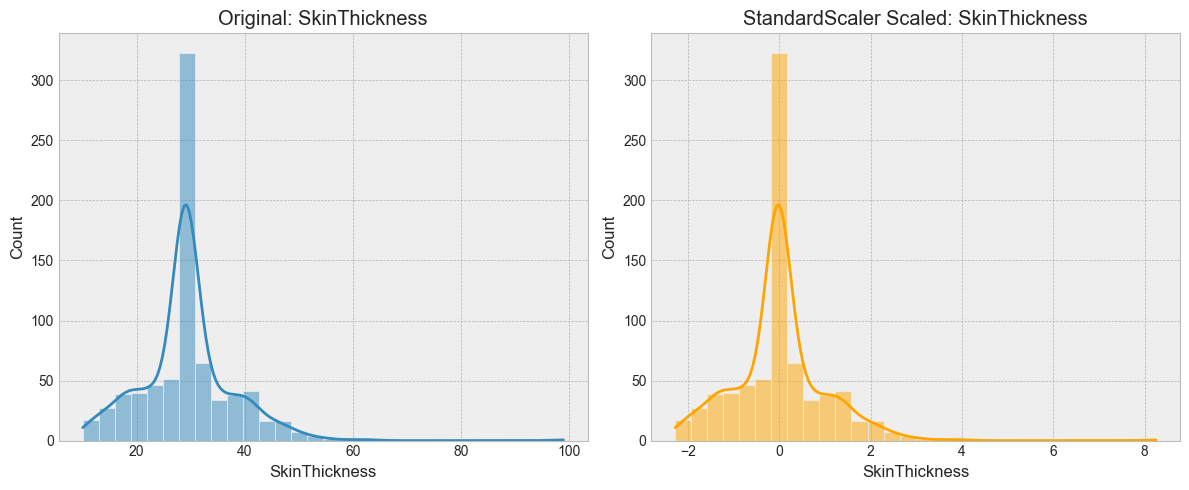

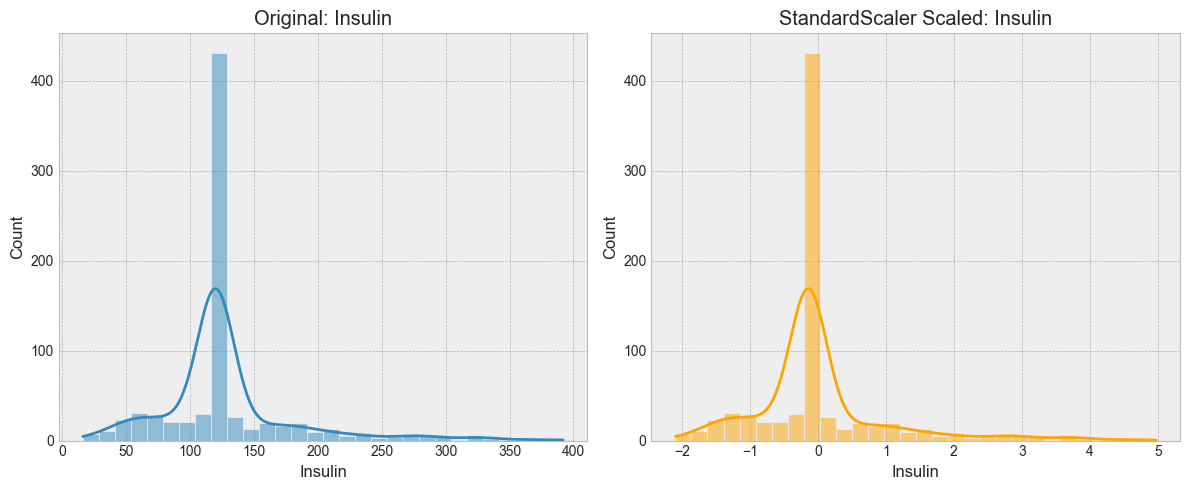

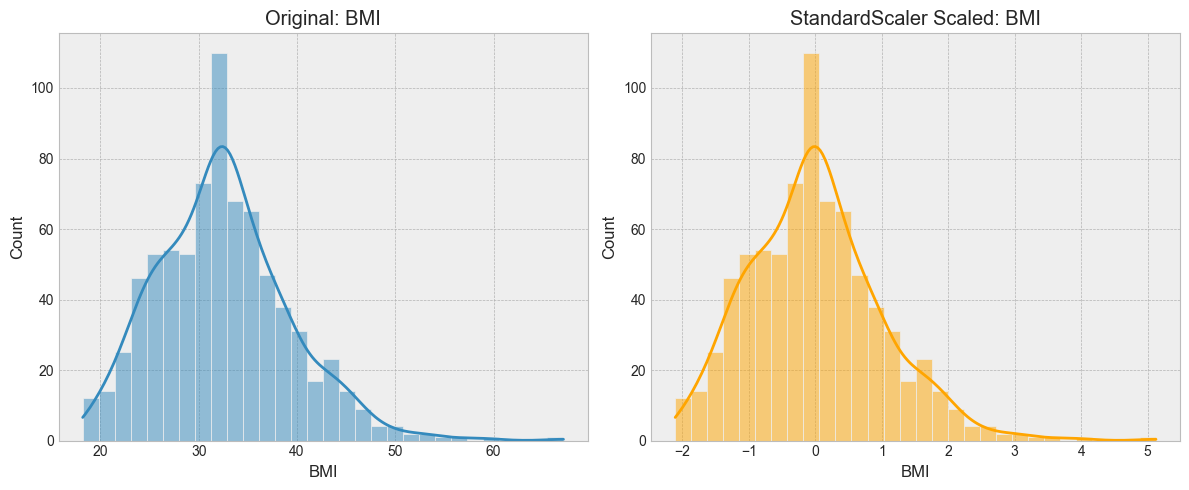

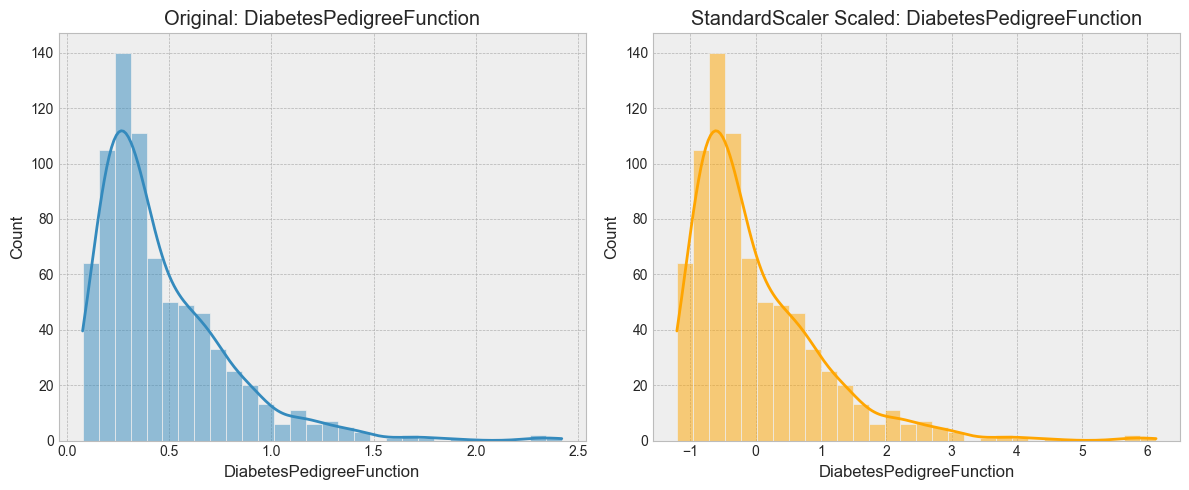

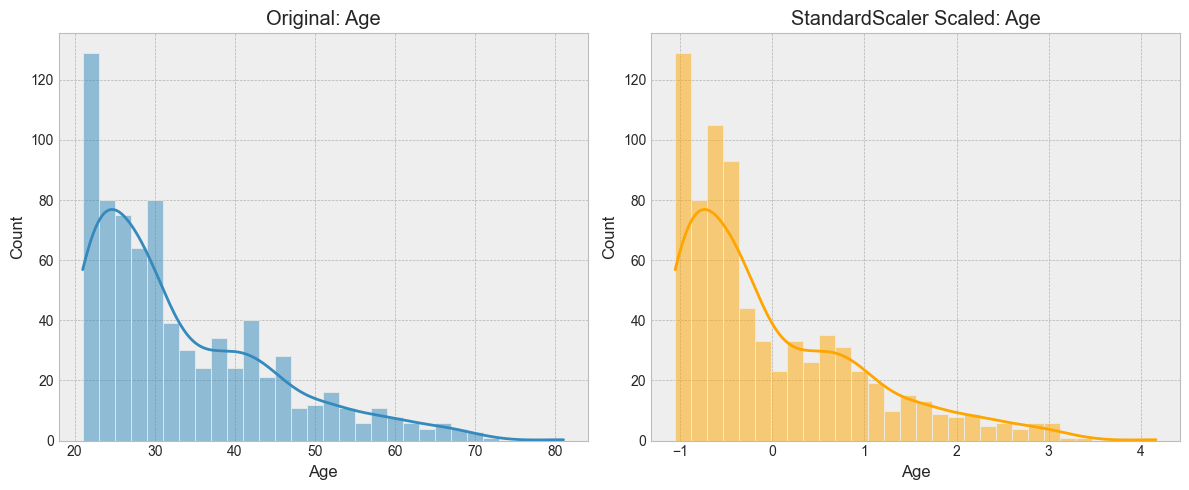

In [16]:
## PART 5A — StandardScaler Visualization

plt.style.use("bmh")

def plot_scaling(original, scaled, method_name):
    for col in original.columns:
        plt.figure(figsize=(12,5))

        # Original
        plt.subplot(1, 2, 1)
        sns.histplot(original[col], kde=True, bins=30)
        plt.title(f"Original: {col}")

        # Scaled
        plt.subplot(1, 2, 2)
        sns.histplot(scaled[col], kde=True, bins=30, color="orange")
        plt.title(f"{method_name} Scaled: {col}")

        plt.tight_layout()
        plt.show()

print("📌 StandardScaler — Before vs After Scaling")
plot_scaling(df[numerical_cols], standard_scaled_df, "StandardScaler")


# 📝 StandardScaler Analysis

## 🔵 StandardScaler — Observations

- The center of every feature shifts to **mean = 0**, and the spread becomes aligned with **std = 1**
- The **shape of the distribution does not change** — only the scale shifts
- **Outliers remain visible** and still influence variance
- Good for features that are **roughly bell-shaped or moderately skewed**

## ✔ Pros

- Standardizes features for models assuming Gaussian distributions
- Works well with algorithms sensitive to variance (SVM, Logistic Regression)
- Maintains original distribution shape

## ✖ Cons

- Still affected by outliers
- Not ideal for heavily skewed features (Insulin, SkinThickness)

## ⭐ When to Use

Use StandardScaler when:
- Data has moderate skewness
- Model requires standardized inputs (SVM, Linear Models, PCA)
- You want equal importance across features

#### MinMaxScaler Visualization

📌 MinMaxScaler — Before vs After Scaling


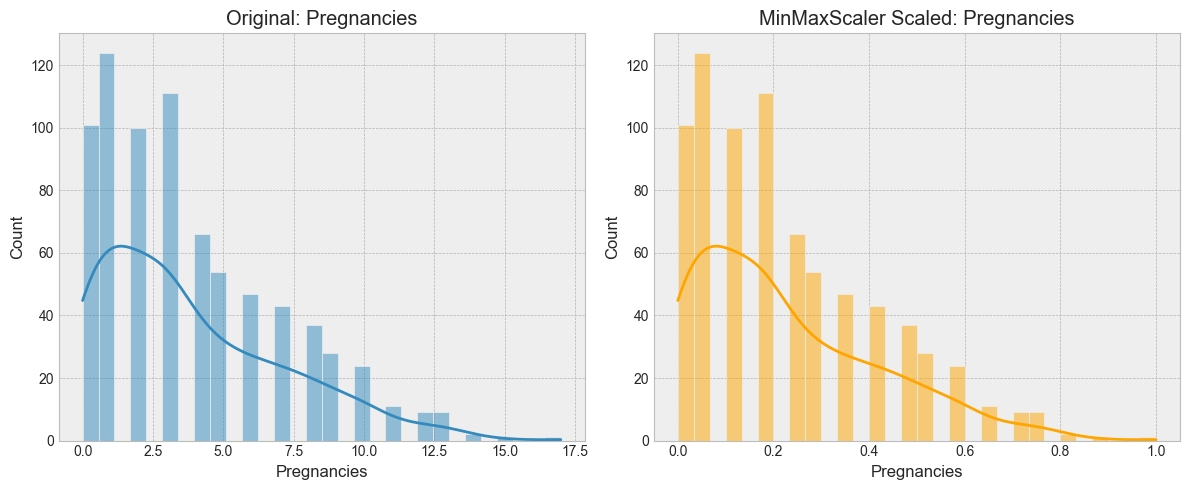

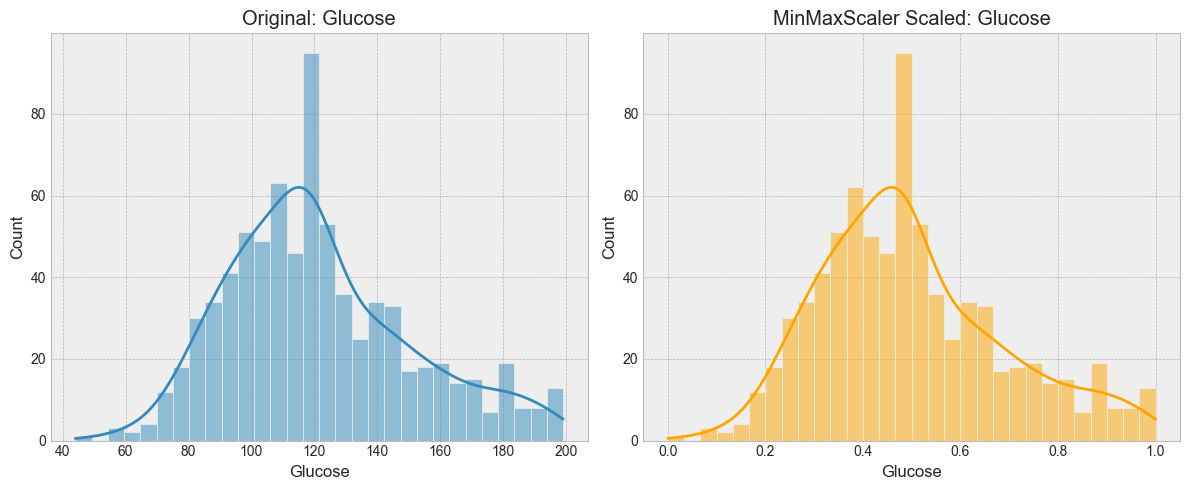

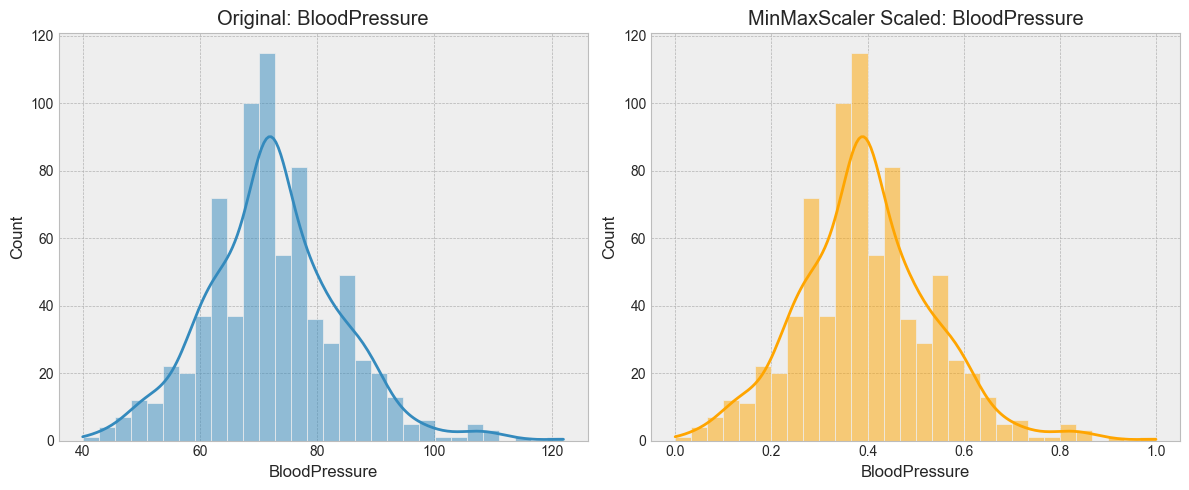

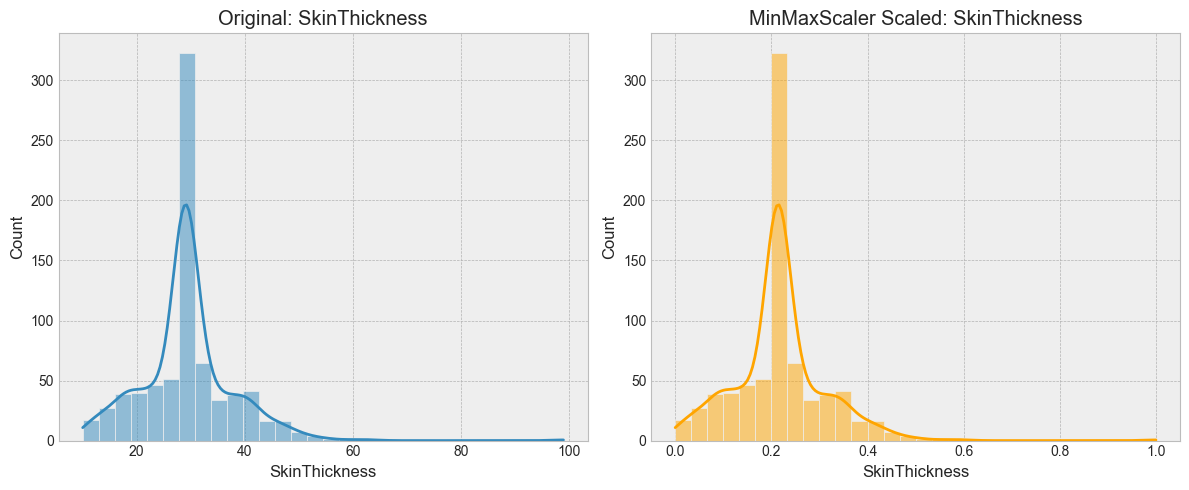

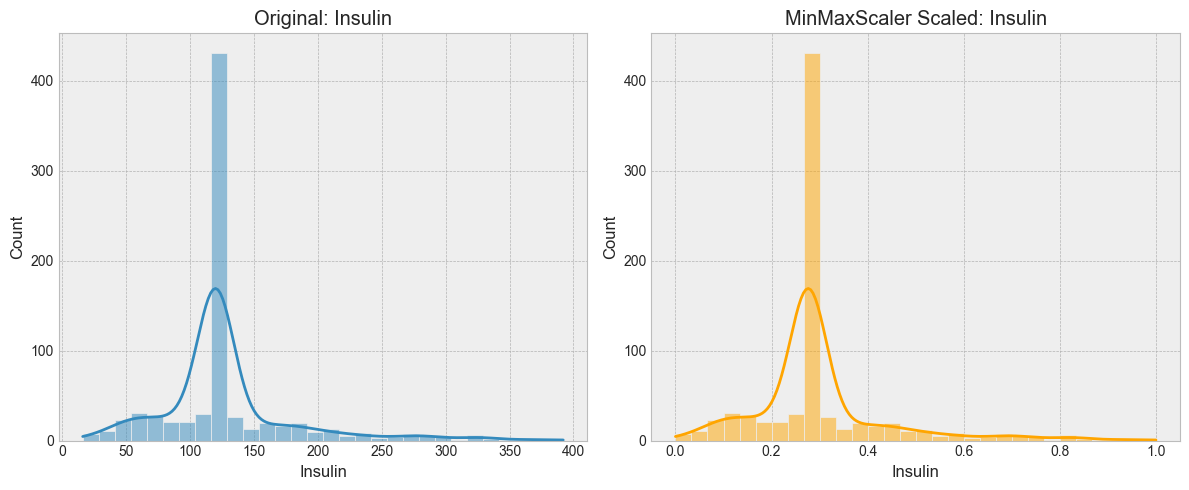

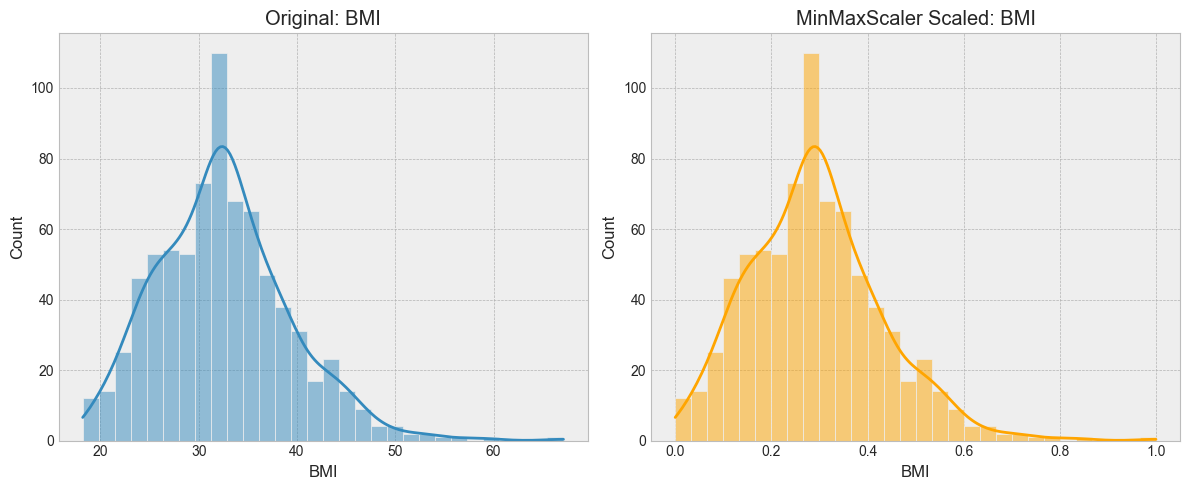

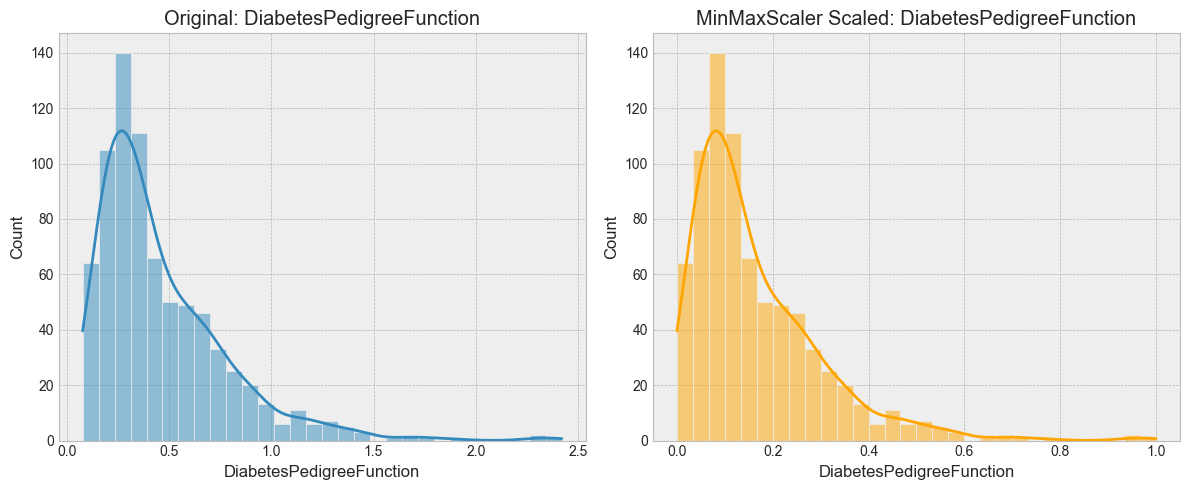

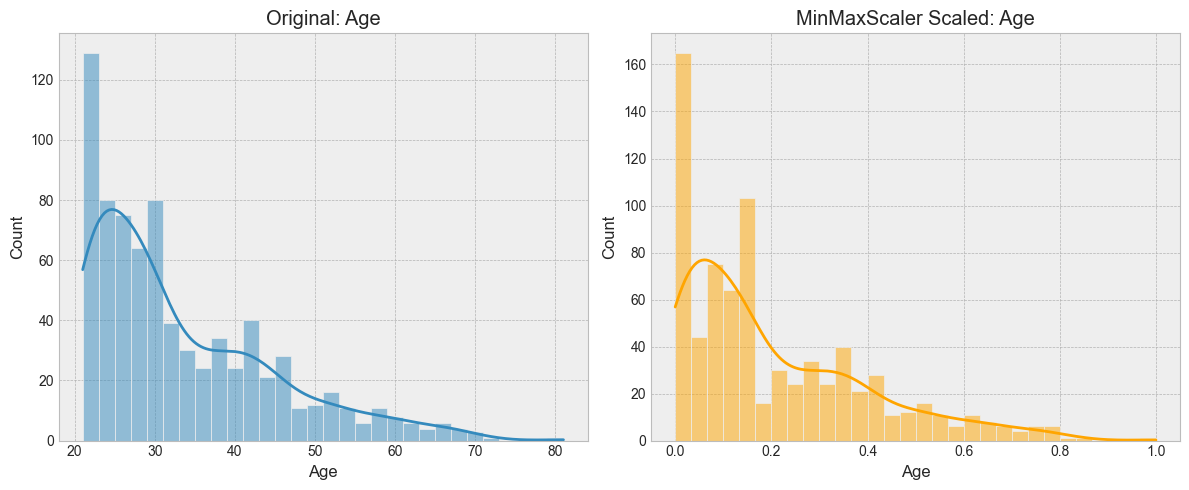

In [17]:
## PART 5B — MinMaxScaler Visualization

print("📌 MinMaxScaler — Before vs After Scaling")
plot_scaling(df[numerical_cols], minmax_scaled_df, "MinMaxScaler")


# 📝 MinMaxScaler Analysis

## 🟢 MinMaxScaler — Observations

- Every feature is strictly compressed to the **0–1 range**
- Features with outliers show **compressed values around 0** because the max value stretches the scale
- **Strong peaks appear** because normal values become tightly packed
- Shape remains the same, but the **range becomes uniform**

## ✔ Pros

- Preserves all relationships and distribution shape
- Perfect for algorithms depending on distance (KNN, Neural Networks)
- Ensures all features are in the same scale range

## ✖ Cons

- **Highly sensitive to outliers** — they dominate the scaling range
- Normal values get **squeezed toward 0** when extreme outliers exist

## ⭐ When to Use

Use MinMaxScaler when:
- You need features strictly between 0 and 1
- Working with neural networks or KNN
- Your dataset has no extreme outliers

#### RobustScaler Visualization

📌 RobustScaler — Before vs After Scaling


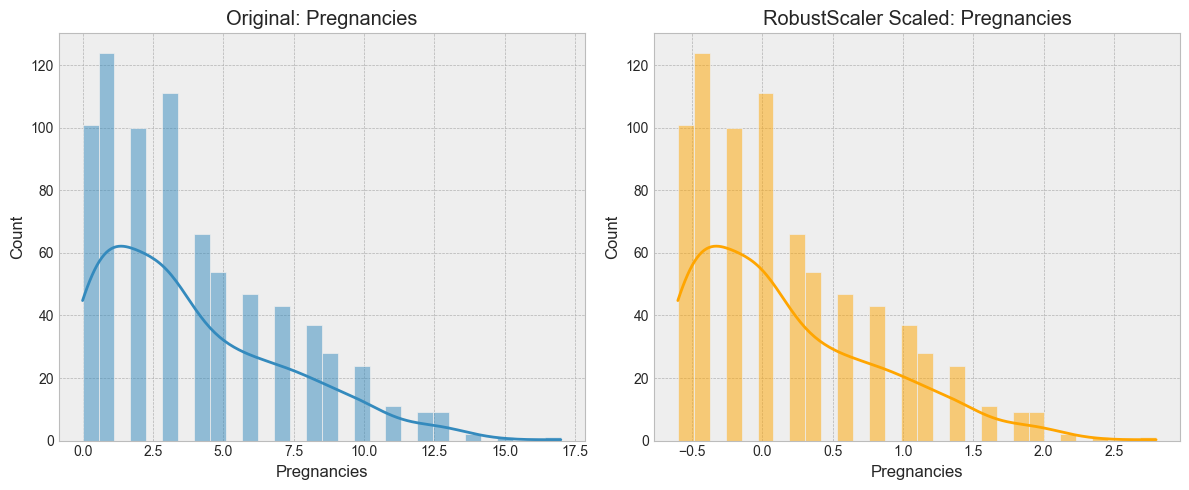

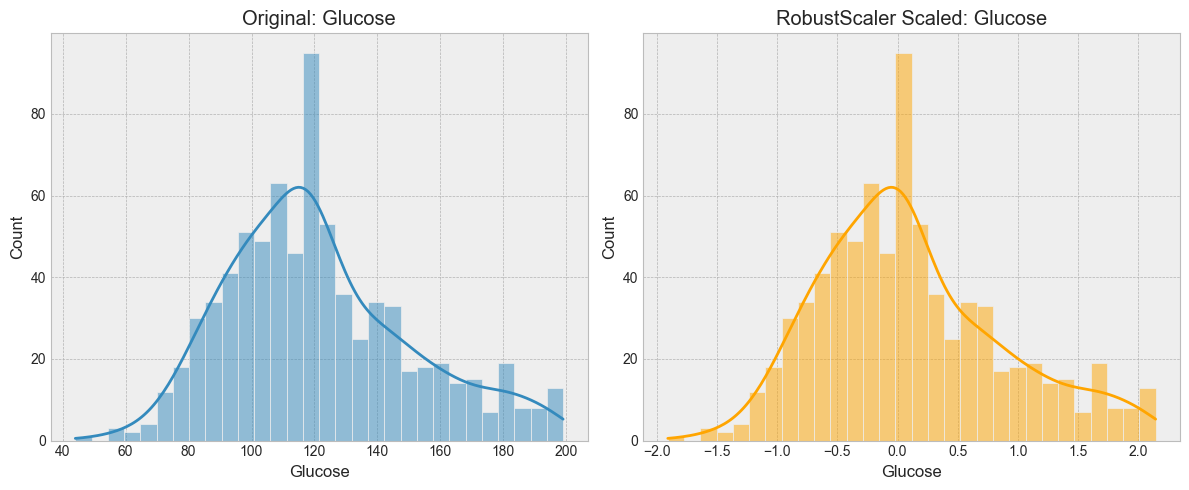

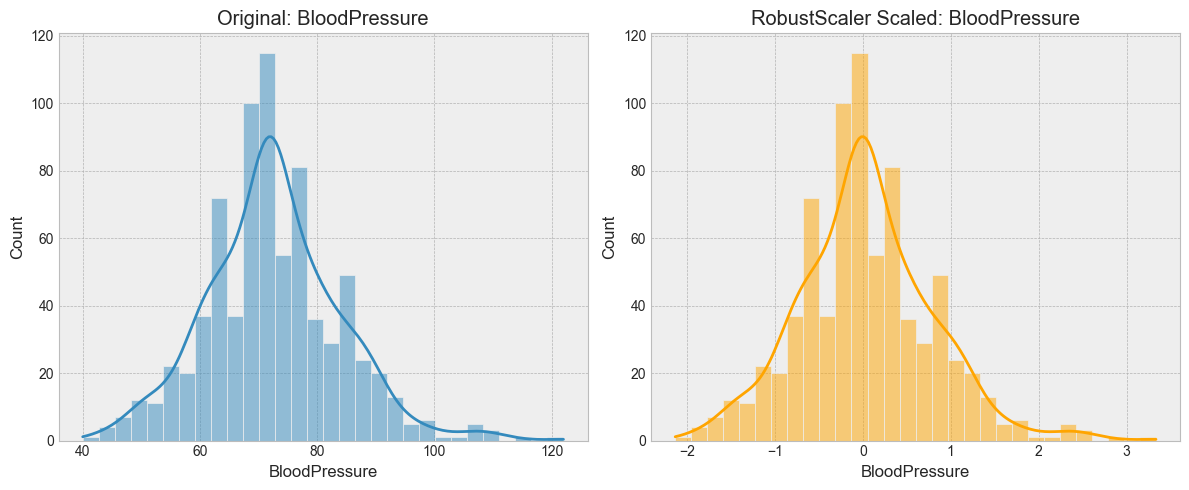

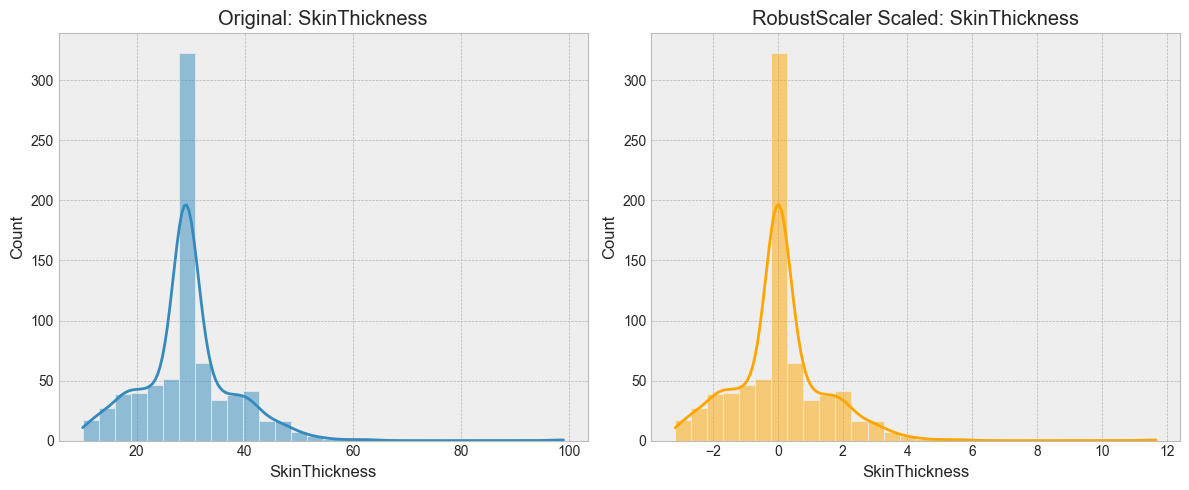

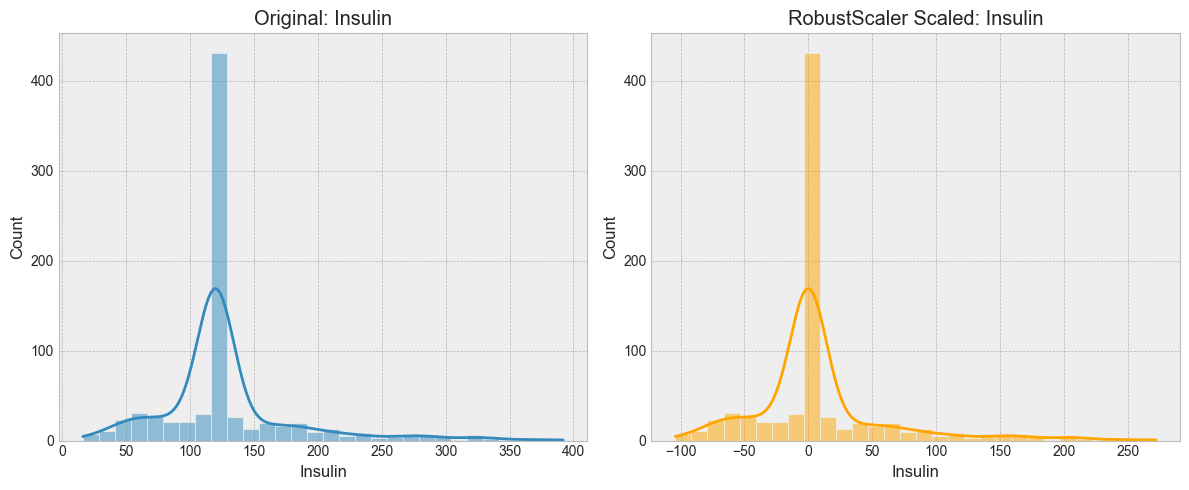

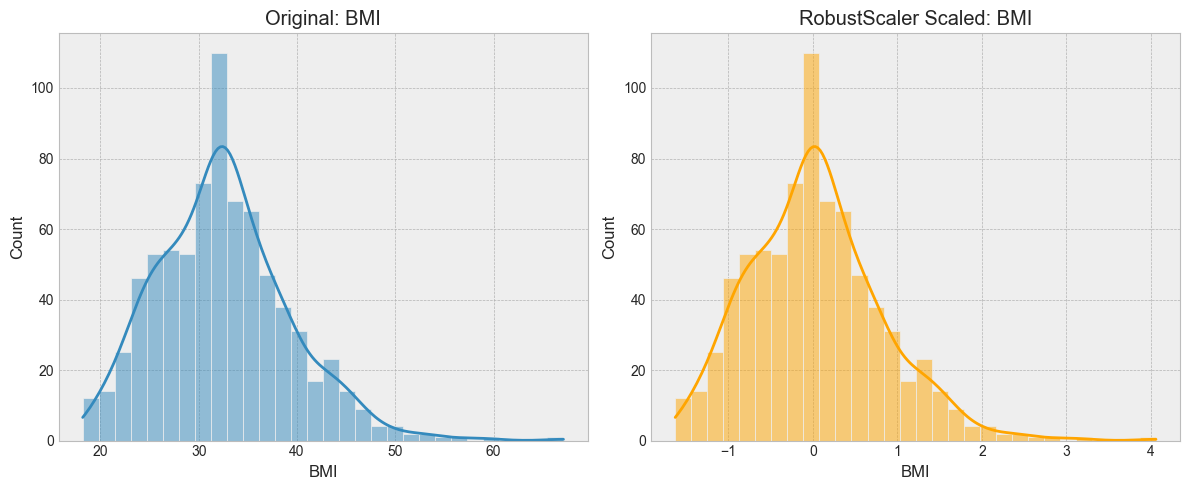

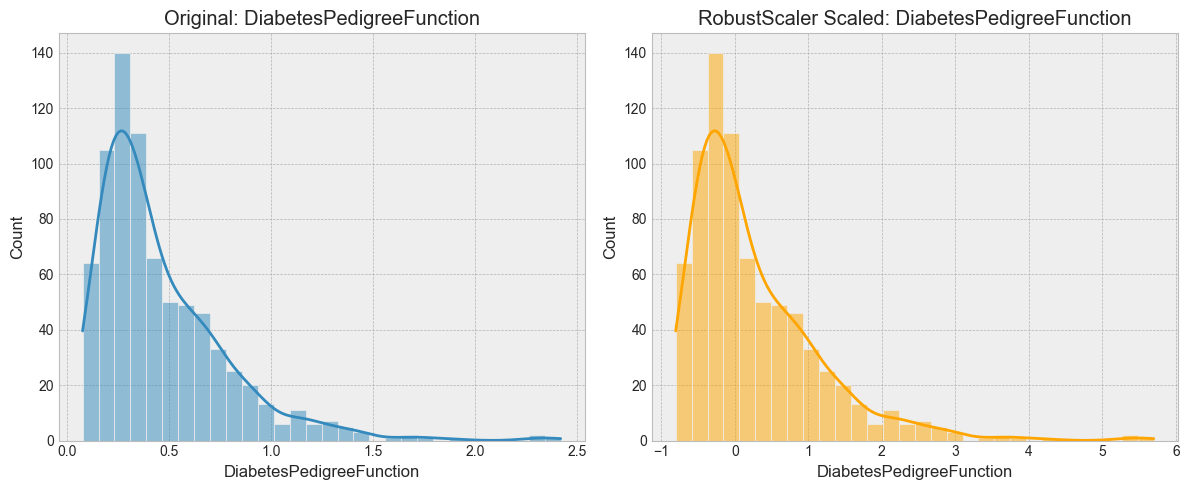

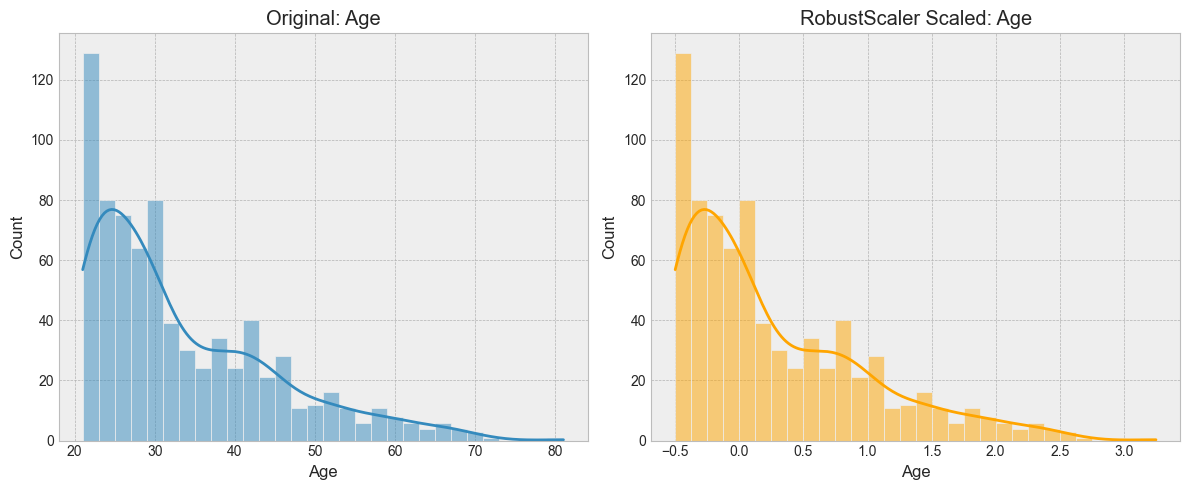

In [18]:
## PART 5C — RobustScaler Visualization

print("📌 RobustScaler — Before vs After Scaling")
plot_scaling(df[numerical_cols], robust_scaled_df, "RobustScaler")


# 📝 RobustScaler Analysis

## 🟣 RobustScaler — Observations

- Uses **median and IQR**, so extreme values are ignored
- Distributions become **smoother**, especially for highly skewed features like Insulin and SkinThickness
- Center moves to 0 (median = 0), but **range is flexible**
- Handles **heavy tails and outliers extremely well**

## ✔ Pros

- **Least affected by outliers**
- Best scaling method for heavily skewed or noisy data
- Preserves true structure of central data

## ✖ Cons

- Does not strictly bound values like MinMax
- Not ideal when data is already clean and normally distributed

## ⭐ When to Use

Use RobustScaler when:
- Dataset has **many outliers or heavy skewness**
- You want a **stable transformation** that ignores extreme values
- Especially suited for **medical datasets**

### PART 6: Saving the Final Outputs

In [21]:
## PART 6 — Saving Final Outputs to Your Folder

# Set your assignment folder path
save_path = r"C:\Users\kishore\OneDrive\Desktop\Machine_Learning\Assignment_Data-Preprocessing"

# Save Standard Scaled data
standard_scaled_df.to_csv(save_path + r"\diabetes_standard_scaled.csv", index=False)

# Save MinMax Scaled data
minmax_scaled_df.to_csv(save_path + r"\diabetes_minmax_scaled.csv", index=False)

# Save Robust Scaled data
robust_scaled_df.to_csv(save_path + r"\diabetes_robust_scaled.csv", index=False)

print("✔ All scaled datasets saved successfully.")

✔ All scaled datasets saved successfully.
